<a href="https://colab.research.google.com/github/giriselvansridhar/22kvs24k_Gold_EDA-/blob/main/DSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


**1. Data Exploration and Visualization**




 (1) Load the Boston Housing Dataset

In [ ]:
import kagglehub
path = kagglehub.dataset_download("jamieleech/boston-housing-dataset")
print("Path to dataset files:", path)
df = pandas.read_csv(path + "/housing.csv")



Path to dataset files: /root/.cache/kagglehub/datasets/jamieleech/boston-housing-dataset/versions/2


(1) Display the first 5 rows

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(2) Create a correlation heatmap for all features in the dataset.

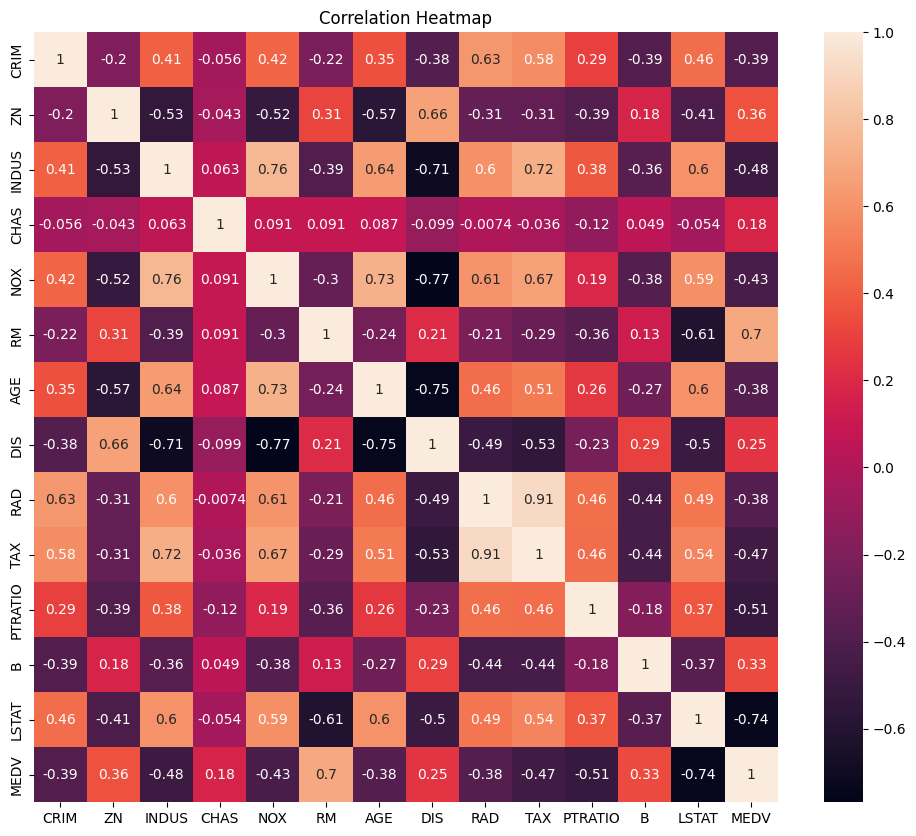

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation,  annot=True)
plt.title("Correlation Heatmap")
plt.show()


(3) Plot a scatter plot of 'RM' (average number of rooms) vs. 'MEDV' (median value of owner-occupied homes).


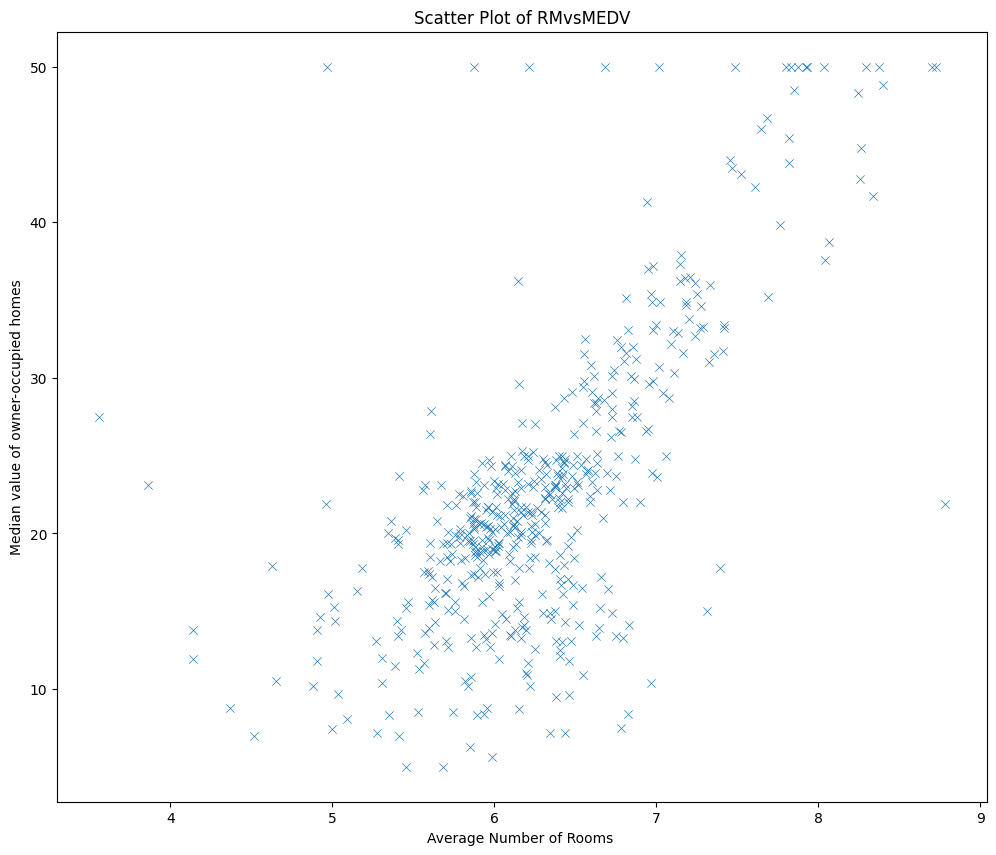

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='RM', y='MEDV', marker='x')
plt.title('Scatter Plot of RMvsMEDV')
plt.xlabel('Average Number of Rooms ')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

**2. Data Preprocessing and Feature Engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler



(1) Check for missing values  in the dataset and handle them appropriately

In [ ]:
missing = df.isnull().sum()
print("Missing Values")
print(missing)
print("No missing Values")


Missing Values
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
No missing Values


(2) Normalise the numerical features using StandardScaler.

In [ ]:
scaler = StandardScaler()
numerical_features = df.drop(columns=['MEDV'])
scaled = scaler.fit_transform(numerical_features)
normalized = pd.DataFrame(scaled, columns=numerical_features.columns)
normalized['MEDV'] = df['MEDV']

The MEDV feature is excluded because it is not normzlided input feature. It is a Target Feature.

(3) Create a new feature that represents the ratio of 'LSTAT' (lower status of the population) to 'RM' (average number of rooms).


In [ ]:
normalized['LSTAT_RM_Ratio'] = df['LSTAT'] / df['RM']
print(normalized.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  \
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  24.0   
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  21.6   
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  34.7   
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  33.4   
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  36.2   

   LSTAT_RM_Ratio  
0        0.757414  
1        1.423454  
2        0.560891  
3        0.420120  
4        0.745767  


**3. Model Building and Evaluation**

Task 1: Implement a Linear Regression model to predict house prices.
Split the data into training and testing sets (80-20 split)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Importing the necessary Libraries
1. Evolvating models Performance
2. Splitting dataset to train split
3. LinearRegression Model

1. Split Data to train and test

> MEDV is again droped as it is target feature



In [ ]:
X = normalized.drop(columns=['MEDV'])
y = normalized['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train it with the Linear Regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make prediction on the test data

In [ ]:
y_pred = model.predict(X_test)

Calculate and print the Mean Squared Error and R-squared score.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:"+str(mse))
print("R-squared Score:"+str(r2))

Mean Squared Error:15.998686300907233
R-squared Score:0.7818374341068595


Task 2: Implement a Random Forest Regressor for the same prediction task.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Train the model with at least 100 trees.

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Make predictions on the test data.

In [ ]:
y_pred_rf = rf.predict(X_test)


Calculate and print the Mean Squared Error and R-squared score.

In [ ]:
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 7.84526487254902
Random Forest R²: 0.8930197715915238


Plot feature importance for the top 5 most important features.

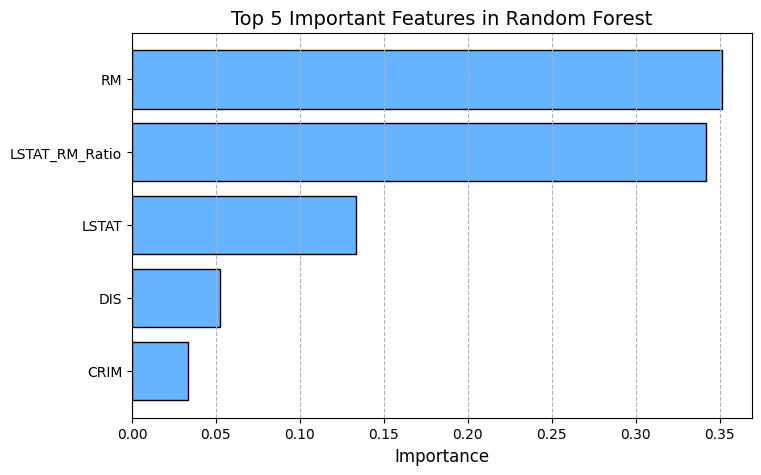

In [ ]:
feature_importances = rf.feature_importances_
top_indices = np.argsort(feature_importances)[-5:]
top_features = X.columns[top_indices]
plt.figure(figsize=(8, 5))
plt.barh(top_features, feature_importances[top_indices], color='#66b3ff', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.title('Top 5 Important Features in Random Forest', fontsize=14)
plt.grid(axis='x', linestyle='--')
plt.show()


**4. Advanced ML Challenge** Task: Implement a simple neural network using any deep learning framework (e.g., TensorFlow, PyTorch) to predict house prices.


Preprocess the data appropriately for neural network input.

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Design a network with at least one hidden layer.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  ])
model.compile(optimizer='adam', loss='mse')

Train the model for a suitable number of epochs.

In [ ]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

Evaluate the model's performance using Mean Squared Error and R-squared score.

In [ ]:
y_pred_nn = model.predict(X_test_scaled).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print("Neural Network MSE:", mse_nn)
print("Neural Network R²:", r2_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Neural Network MSE: 14.301962831823877
Neural Network R²: 0.8049744303991954
